In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import time


import logistic_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from collections import defaultdict

np.random.seed(44)  # for comparison of results

In [23]:
def compare_methods_v2(
    X, y, algorithms=["iwls", "sgd", "adam"], k=15, test_size=0.2, interaction=False
):
    final_metrics = pd.DataFrame(
        columns=[
            "Algorithm",
            "Interactions",
            "AlgorithmInteractions",
            "Balanced Accuracy",
            "Time",
            "run_number",
        ]
    )
    after_epoch_metrics = defaultdict(list)
    interaction_opt = [False]
    if interaction:
        interaction_opt.append(True)

    for alg in algorithms:
        for inter in interaction_opt:
            alg_inter = alg + ("_inter" if inter else "")
            for i in range(k):

                # Split data and create regressor object
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=test_size
                )
                model = logistic_regression.LogisticRegressor(
                    descent_algorithm=alg, include_interactions=inter
                )

                # Fit model and record time
                start = time.perf_counter()
                model.fit(X_train, y_train, max_num_epoch=500, tolerance=1e-3)
                end = time.perf_counter() - start

                # Record metrics
                loss_after_epoch = model.convergence_rate
                after_epoch_metrics[alg_inter].append(loss_after_epoch)
                final_metrics.loc[len(final_metrics)] = [
                    alg,
                    inter,
                    alg_inter,
                    model.balanced_accuracy(X_test, y_test),
                    end,
                    i + 1,
                ]
                print(f"Run {i+1} of {alg_inter} completed")
    return final_metrics, after_epoch_metrics

In [24]:
diabetes = pd.read_csv("data/diabetes.csv")
diabetes_y = diabetes["target"]
diabetes_X = diabetes.drop(columns=["target"])
mean = diabetes_X.mean()
std = diabetes_X.std()
diabetes_X = (diabetes_X - mean) / std

rice = pd.read_csv("data/rice.csv")
rice_y = rice["target"]
rice_X = rice.drop(columns=["target"])
mean = rice_X.mean()
std = rice_X.std()
rice_X = (rice_X - mean) / std

raisin = pd.read_csv("data/raisin.csv")
raisin_y = raisin["target"]
raisin_X = raisin.drop(columns=["target"])
mean = raisin_X.mean()
std = raisin_X.std()
raisin_X = (raisin_X - mean) / std

In [25]:
final_diabetes, after_epoch_diabetes = compare_methods_v2(
    diabetes_X, diabetes_y, interaction=True
)

Run 1 of iwls completed
Run 2 of iwls completed
Run 3 of iwls completed
Run 4 of iwls completed
Run 5 of iwls completed
Run 6 of iwls completed
Run 7 of iwls completed
Run 8 of iwls completed
Run 9 of iwls completed
Run 10 of iwls completed
Run 11 of iwls completed
Run 12 of iwls completed
Run 13 of iwls completed
Run 14 of iwls completed
Run 15 of iwls completed
Run 1 of iwls_inter completed
Run 2 of iwls_inter completed
Run 3 of iwls_inter completed
Run 4 of iwls_inter completed
Run 5 of iwls_inter completed
Run 6 of iwls_inter completed
Run 7 of iwls_inter completed
Run 8 of iwls_inter completed
Run 9 of iwls_inter completed
Run 10 of iwls_inter completed
Run 11 of iwls_inter completed
Run 12 of iwls_inter completed
Run 13 of iwls_inter completed
Run 14 of iwls_inter completed
Run 15 of iwls_inter completed
Early stopping criterion reached at epoch 130.
Run 1 of sgd completed
Early stopping criterion reached at epoch 122.
Run 2 of sgd completed
Early stopping criterion reached at ep

Text(0.5, 0, 'Algorithm')

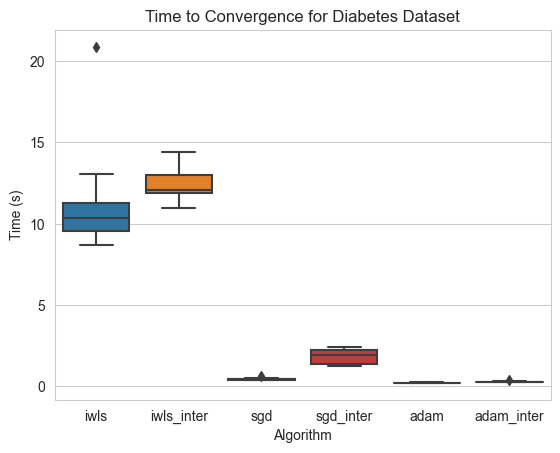

In [30]:
sns.set_style("whitegrid")
sns.boxplot(data=final_diabetes, x="AlgorithmInteractions", y="Time")
plt.title("Time to Convergence for Diabetes Dataset")
plt.ylabel("Time (s)")
plt.xlabel("Algorithm")

Text(0.5, 0, 'Algorithm')

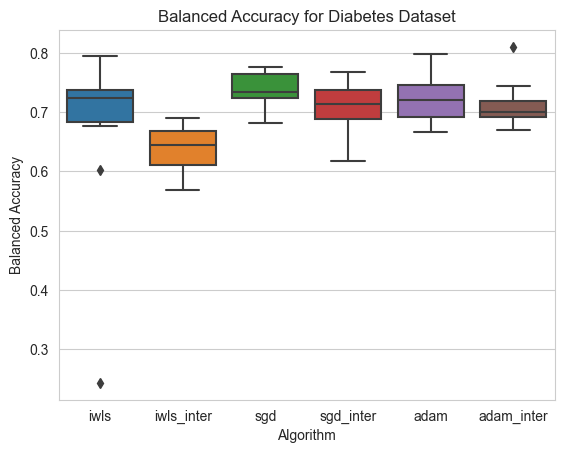

In [27]:
sns.boxplot(data=final_diabetes, x="AlgorithmInteractions", y="Balanced Accuracy")
plt.title("Balanced Accuracy for Diabetes Dataset")
plt.xlabel("Algorithm")

Text(0, 0.5, 'Loss')

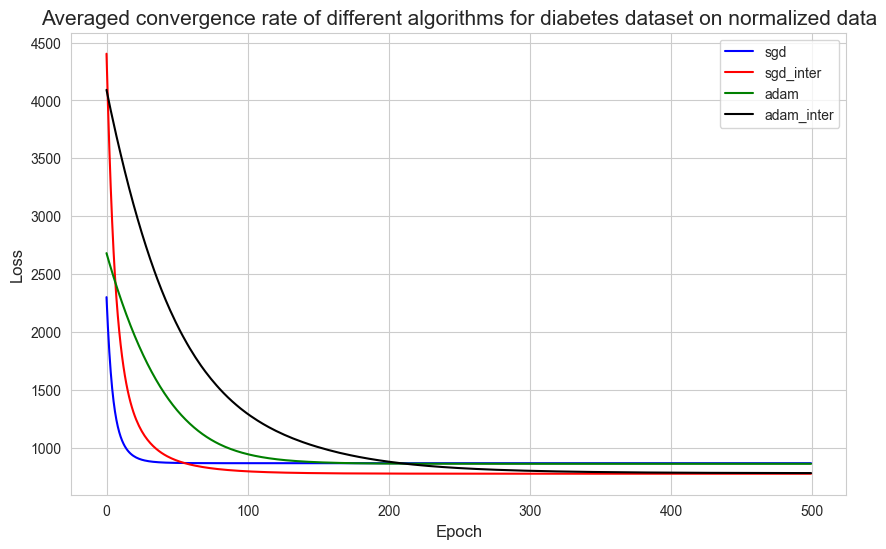

In [32]:
plt.figure(figsize=(10, 6))
colors = ["blue", "red", "green", "black", "purple", "orange"]
for alg_name, runs in after_epoch_diabetes.items():
    averaged = np.zeros(501)
    for run in runs:
        for i in range(501):
            if i < len(run):
                averaged[i] += run[i]
            else:
                averaged[i] += run[-1]
    averaged = averaged / 5
    if alg_name == "iwls" or alg_name == "iwls_inter":
        continue
    plt.plot(averaged[:500], label=alg_name, color=colors[0])
    colors.pop(0)
plt.legend()
plt.title("Averaged convergence rate of different algorithms for diabetes dataset on normalized data", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

Text(0, 0.5, 'Loss')

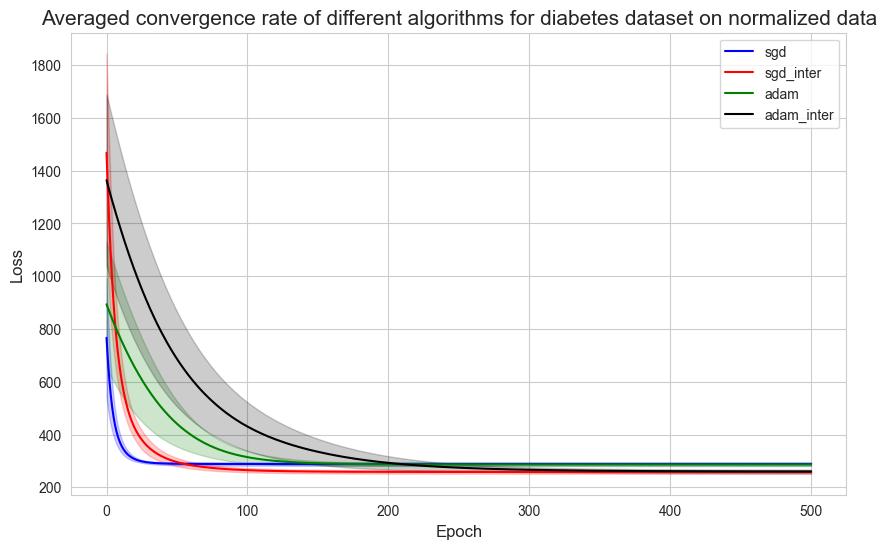

In [29]:
after_epoch_diabetes_processed = defaultdict(list)
for alg_name, runs in after_epoch_diabetes.items():
    for run in runs:
        zeros = np.zeros(501)
        for i in range(501):
            if i < len(run):
                zeros[i] = run[i]
            else:
                zeros[i] = run[-1]
        after_epoch_diabetes_processed[alg_name].append(zeros)

plt.figure(figsize=(10, 6))
colors = ["blue", "red", "green", "black", "purple", "orange"]
for alg_name, runs in after_epoch_diabetes_processed.items():
    if alg_name == "iwls" or alg_name == "iwls_inter":
        continue
    runs = np.array(runs)
    plt.plot(runs.mean(axis=0), label=alg_name, color=colors[0])
    plt.fill_between(
        range(501), runs.mean(axis=0) - runs.std(axis=0), runs.mean(axis=0) + runs.std(axis=0), alpha=0.2, color=colors[0]
    )
    colors.pop(0)
plt.legend()
plt.title("Averaged convergence rate of different algorithms for diabetes dataset on normalized data", fontsize=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

In [33]:
final_rice, after_epoch_rice = compare_methods_v2(
    rice_X, rice_y, interaction=True, k=1
)

Time run our at epoch 52.
Run 1 of iwls completed
Time run our at epoch 47.
Run 1 of iwls_inter completed
Run 1 of sgd completed
Run 1 of sgd_inter completed
Run 1 of adam completed
Run 1 of adam_inter completed


Text(0.5, 1.0, 'Time to Convergence for Rice Dataset')

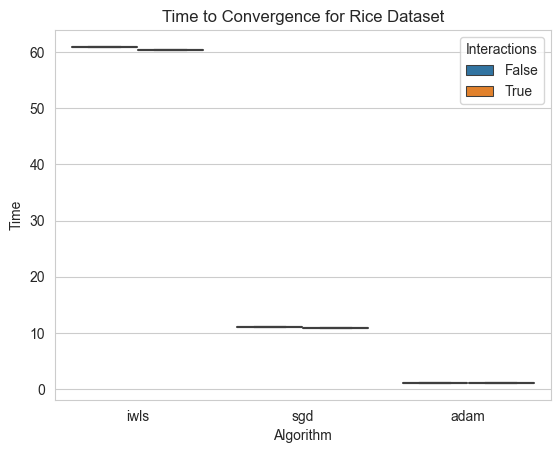

In [34]:
sns.boxplot(data=final_rice, x="Algorithm", y="Time", hue="Interactions")
plt.title("Time to Convergence for Rice Dataset")

Text(0.5, 1.0, 'Balanced Accuracy for Rice Dataset')

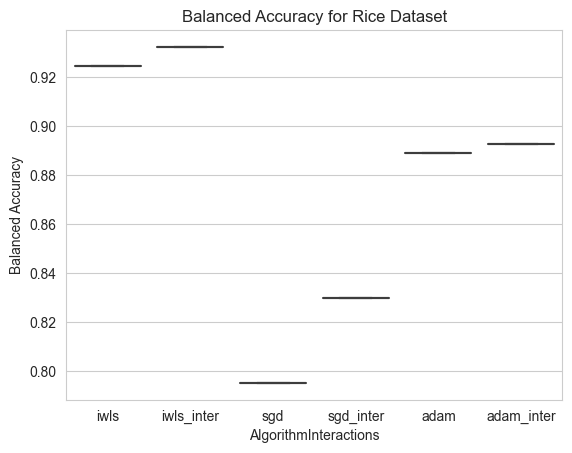

In [35]:
sns.boxplot(data=final_rice, x="AlgorithmInteractions", y="Balanced Accuracy")
plt.title("Balanced Accuracy for Rice Dataset")

Text(0, 0.5, 'Loss')

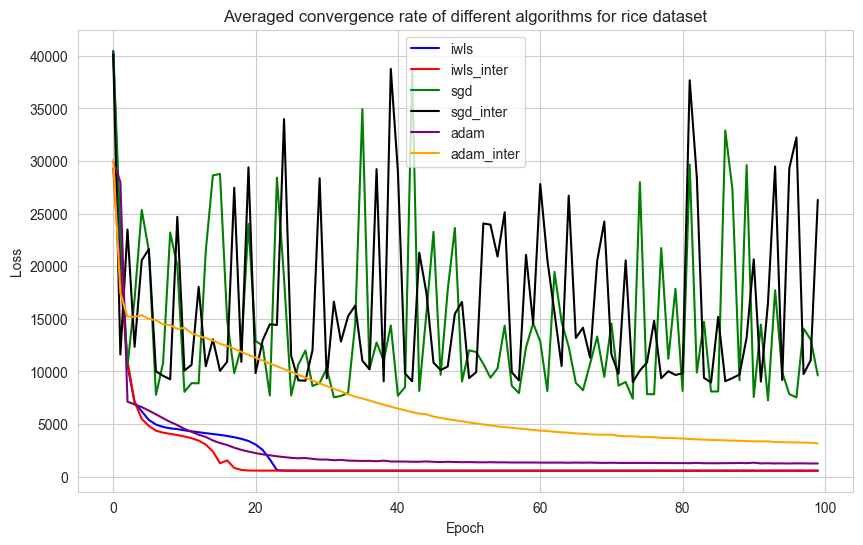

In [36]:
plt.figure(figsize=(10, 6))
colors = ["blue", "red", "green", "black", "purple", "orange"]
for alg_name, runs in after_epoch_rice.items():
    averaged = np.zeros(501)
    for run in runs:
        for i in range(501):
            if i < len(run):
                averaged[i] += run[i]
            else:
                averaged[i] += run[-1]
    plt.plot(averaged[:100], label=alg_name, color=colors[0])
    colors.pop(0)
plt.legend()
plt.title("Averaged convergence rate of different algorithms for rice dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss")